In [10]:
import os
import json
from PIL import Image, ImageDraw
import re
import numpy as np
import cv2
import imageio
import matplotlib.pyplot as plt
import tifffile as tiff
from tqdm import tqdm
from skimage.exposure import equalize_adapthist
from scipy.stats import stats
import matplotlib.animation as animation
import pandas as pd
import csv
import shutil
from skimage.morphology import dilation, erosion
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage import measure

/tmp/ipykernel_477316/3358857403.py:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(mask_path)


Labels from the mask: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Reviewing small cell sizes (less than 100 pixels):

Number of cells after applying size threshold: 31
Average cell size: 51044.290322580644 pixels
Minimum cell size: 1033.0 pixels (Label: 6)
Maximum cell size: 140595.0 pixels (Label: 14)
Background size: 7885531 pixels(Label: 0)

Individual cell areas after filtering:
Cell label: 1, Cell area: 125850.0 pixels
Cell label: 2, Cell area: 61124.0 pixels
Cell label: 3, Cell area: 36608.0 pixels
Cell label: 4, Cell area: 43080.0 pixels
Cell label: 5, Cell area: 5588.0 pixels
Cell label: 6, Cell area: 1033.0 pixels
Cell label: 7, Cell area: 104581.0 pixels
Cell label: 8, Cell area: 65798.0 pixels
Cell label: 9, Cell area: 122146.0 pixels
Cell label: 10, Cell area: 39833.0 pixels
Cell label: 11, Cell area: 38191.0 pixels
Cell label: 12, Cell area: 55054.0 pixels
Cell label: 13, Cell area: 120763.0 pixels
Cell label: 14, Cell

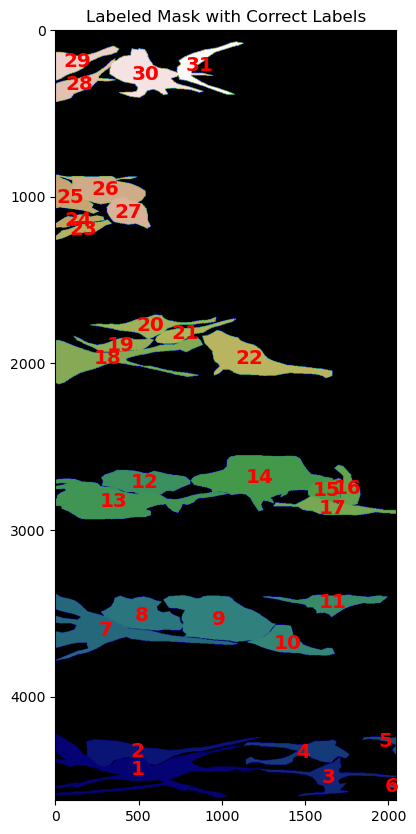

In [8]:



def analyze_mask(frame, mask_path_template, size_threshold=1000):


    def make_np(img):
        return np.array(img)


    def plot_labels(original, ax, title=None,
                    txt_args={'color':'red', 'ha':'center', 'va':'center', 
                              'fontsize':'x-large', 'fontweight':'bold'},
                    cmap='gist_earth'):
        ax.imshow(original, cmap=cmap)
        labels = np.unique(original)
        print("Labels in plot_labels function:", labels)
        ax.set_title(title)
        for label in labels:
            if label != 0:  # Skip background label
                inds = np.argwhere(original == label)
                loc = inds.mean(0)
                ax.text(loc[1], loc[0], str(label), **txt_args)

    
    # Load the mask image using imageio
    mask_path = mask_path_template.format(frame=frame)
    mask = imageio.imread(mask_path)

    # Print the labels directly from the mask
    unique_labels = np.unique(mask)
    print("Labels from the mask:", unique_labels)

    # Measure the properties of the labeled regions
    properties = measure.regionprops(mask)

    # Extract areas and labels, review small cell sizes
    labeled_areas = [(prop.label, prop.area) for prop in properties if prop.label != 0]
    labels, areas = zip(*labeled_areas)

    # Print details of very small cells
    print("Reviewing small cell sizes (less than 100 pixels):")
    for label, area in zip(labels, areas):
        if area < 100:
            print(f"Cell label: {label}, Cell size: {area} pixels")

    # Apply a size threshold to filter out small artifacts
    filtered_areas = [(prop.label, prop.area) for prop in properties if prop.label != 0 and prop.area >= size_threshold]
    filtered_labels, filtered_areas = zip(*filtered_areas)

    # Calculate the area of the background
    background_area = np.sum(mask == 0)

    # Compute the average, min, and max cell sizes for filtered cells
    average_cell_size_filtered = np.mean(filtered_areas)
    min_cell_size_filtered = np.min(filtered_areas)
    max_cell_size_filtered = np.max(filtered_areas)
    min_cell_label_filtered = filtered_labels[np.argmin(filtered_areas)]
    max_cell_label_filtered = filtered_labels[np.argmax(filtered_areas)]

    # Display filtered results and areas of individual cells
    print(f"\nNumber of cells after applying size threshold: {len(filtered_areas)}")
    print(f"Average cell size: {average_cell_size_filtered} pixels")
    print(f"Minimum cell size: {min_cell_size_filtered} pixels (Label: {min_cell_label_filtered})")
    print(f"Maximum cell size: {max_cell_size_filtered} pixels (Label: {max_cell_label_filtered})")
    print(f"Background size: {background_area} pixels(Label: 0)")
    # print(f"Background label: 0")

    # Print areas of individual cells
    print("\nIndividual cell areas after filtering:")
    for label, area in zip(filtered_labels, filtered_areas):
        print(f"Cell label: {label}, Cell area: {area} pixels")

    # Plot the labels for filtered cells, excluding the background label
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_labels(mask, ax, title="Labeled Mask with Correct Labels")
    plt.show()

# Example usage

# frame = 1955
# mask_path_template = "/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data-P2/01_ST/SEG/man_seg{frame:04d}.tif"

frame = 25
# mask_path_template = "/home/MinaHossain/DMNet_Rina/Cell-Data-P2/04B_RES-GT/mask{frame:04d}.tif"
mask_path_template = "/home/MinaHossain/DMNet_Rina/training_codes/Data/train/Cell-Data-P2/02_GT/SEG/man_seg{frame:04d}.tif"
# mask_path_template = "/data/MinaHossain/Cell_Data_All/Cell_Data_Processed/July_Train_lastweek/6row_images_Track/02_GT_ORIGINAL/SEG/man_seg{frame:04d}.tif"
analyze_mask(frame, mask_path_template)



